In [57]:
#Loading the datset
import pandas as pd
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#basic info of the dataset
print(df.shape)
print(df.isnull().sum())
df.info()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83

In [59]:
#data handling by replacing misiing values with mean,median,mode
mean = df['Age'].mean()
df['Age'].fillna(mean,inplace = True)

mode = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode,inplace = True)

median = df['Embarked'].mode()[0]
df['Embarked'].fillna(median,inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3489703936.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean,inplace = True)
/tmp/ipython-input-3489703936.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [60]:
#converting categorical into numerical by encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Embarked'].head()

,Embarked
0,2
1,0
2,2
3,2
4,2


In [61]:
#standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
print(df['Age'].head())

0   -0.592481
1    0.638789
2   -0.284663
3    0.407926
4    0.407926
Name: Age, dtype: float64


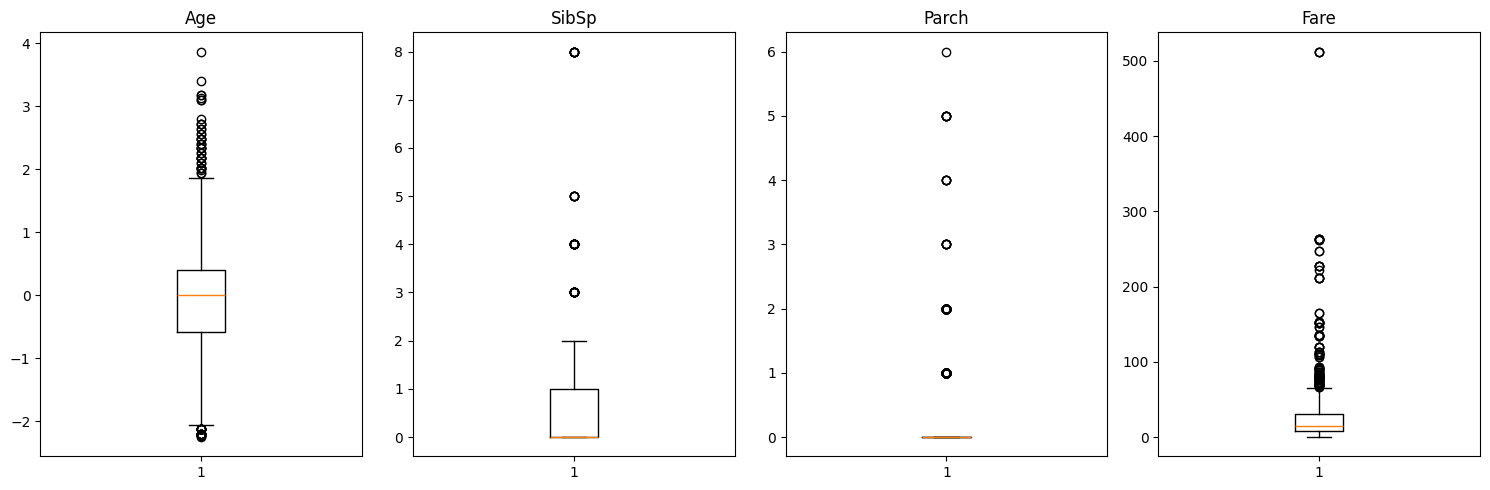

In [62]:
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

# Iterate through the numerical_cols list and create a boxplot for each
for i, col in enumerate(numerical_cols):
    ax[i].boxplot(df[col])
    ax[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [63]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df[~outlier_mask]

removed_rows_count = len(df) - len(df_no_outliers)
print(f"Total number of rows removed due to outliers: {removed_rows_count}")

df = df_no_outliers.copy()


Total number of rows removed due to outliers: 314


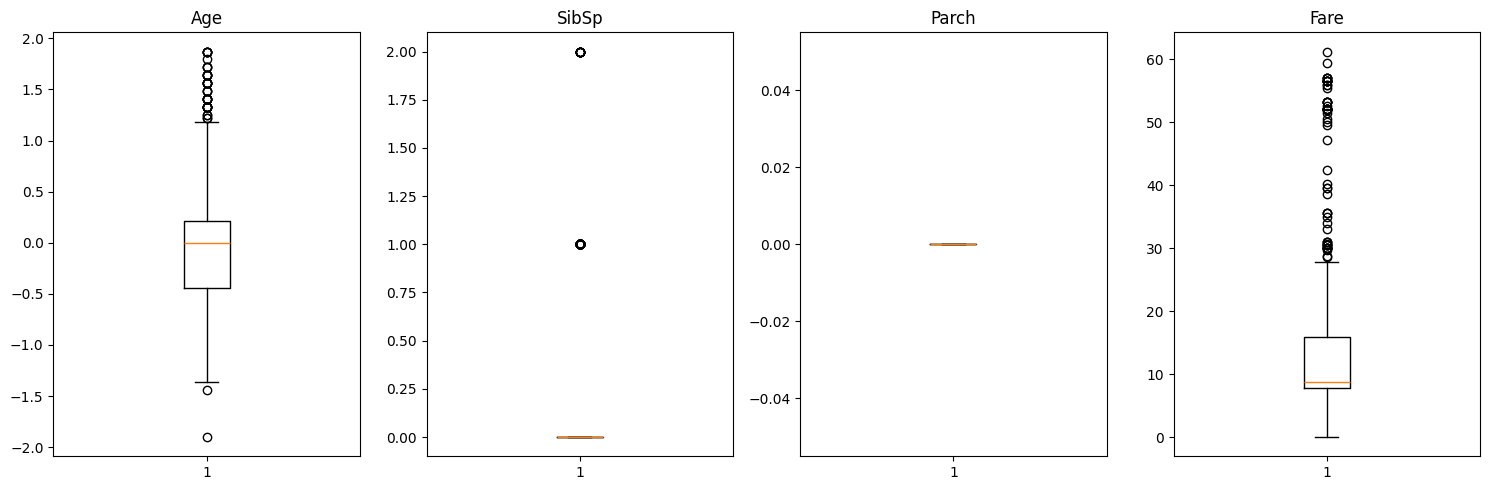

In [64]:
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure and a set of subplots for visualization after outlier removal
fig, ax = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

# Iterate through the numerical_cols list and create a boxplot for each
for i, col in enumerate(numerical_cols):
    ax[i].boxplot(df[col])
    ax[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()